In [1]:
#@title **MONTAR EL DRIVE** { display-mode: "form" }
import os
from google.colab import drive

path_ai = "Inteligencia_Artificial_1" #@param {type:"string"}
path = "/content/drive/My Drive/" + path_ai
drive.mount('/content/drive')
os.chdir(path)
print(os.getcwd())

Mounted at /content/drive
/content/drive/My Drive/Inteligencia_Artificial_1


In [2]:
#@title **IMPORTAR LIBRERIAS**

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import imageio.v3 as iio
import skimage as ski
import cv2
from pathlib import Path
sns.set_theme()
pd.__version__

'2.0.3'

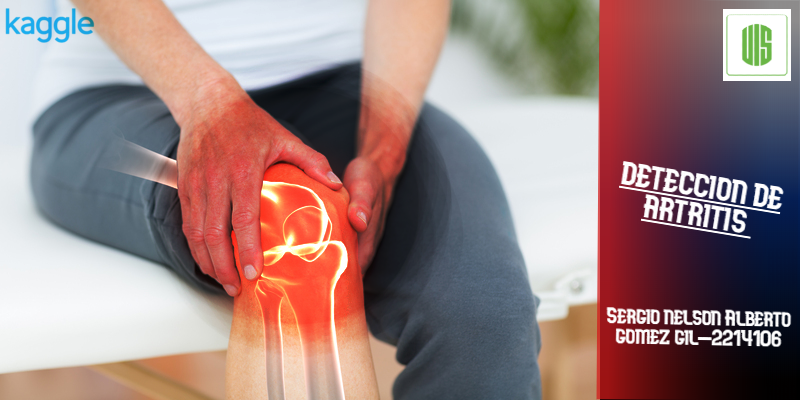

**HABLANDO SOBRE ARTROSIS**

Introducción:


La artrosis, también conocida como osteoartritis, es una enfermedad degenerativa de las articulaciones que afecta principalmente a personas de edad avanzada, aunque también puede manifestarse en personas más jóvenes debido a lesiones, sobrepeso u otros factores. Esta afección causa dolor, rigidez y disminución de la movilidad en las articulaciones afectadas, lo que puede tener un impacto significativo en la calidad de vida de quienes la padecen.


¿Qué es la artrosis?

La artrosis es una enfermedad crónica que afecta al cartílago articular, el tejido que recubre los extremos de los huesos en las articulaciones. El cartílago se desgasta gradualmente, lo que provoca que los huesos rocen entre sí, causando dolor, inflamación y deformidad articular con el tiempo.


Causas y Factores de Riesgo:

Las causas exactas de la artrosis aún no se comprenden completamente, pero se cree que implican una combinación de factores genéticos, biomecánicos y ambientales. Algunos factores de riesgo incluyen la edad avanzada, la obesidad, lesiones articulares previas, el sexo (más común en mujeres) y la predisposición genética.


Síntomas:

Los síntomas típicos de la artrosis incluyen dolor articular, rigidez, inflamación, crepitación (ruido al mover la articulación), disminución de la movilidad y deformidades articulares. Estos síntomas pueden variar en gravedad y afectar diferentes articulaciones del cuerpo, como las rodillas, caderas, manos y columna vertebral.


Diagnóstico y Tratamiento:

El diagnóstico de la artrosis generalmente se basa en la evaluación clínica, los síntomas del paciente y pruebas de imagen como radiografías o resonancias magnéticas. El tratamiento busca aliviar el dolor, mejorar la función articular y retrasar la progresión de la enfermedad. Esto puede incluir medidas conservadoras como el ejercicio regular, la fisioterapia, la pérdida de peso en caso de obesidad, medicamentos para el dolor y la inflamación, así como procedimientos quirúrgicos en casos graves.


Conclusiones:

La artrosis es una enfermedad crónica y progresiva que afecta a millones de personas en todo el mundo. Aunque no tiene cura, un diagnóstico temprano y un manejo adecuado pueden ayudar a mejorar la calidad de vida de quienes la padecen. La investigación continua sobre las causas y los tratamientos de la artrosis es fundamental para desarrollar nuevas terapias que puedan prevenir, detener o revertir el daño articular en el futuro.

In [3]:
#@title **MONTAR IMAGENES DE PRUEBA**

import cv2
import numpy as np
import os
import matplotlib.pyplot as plt


ruta_test_normal= "/content/drive/MyDrive/Inteligencia_Artificial_1/test/test/Normal"
ruta_test_artritis= "/content/drive/MyDrive/Inteligencia_Artificial_1/test/test/Osteoarthritis"
todas_imagenes=[]
imagenes_test_normal = []
imagenes_test_artritis = []
imagenes_test= []
y_test=[]
img_size=100

y=0
for img in os.listdir(ruta_test_normal): #imagenes de prueba normales
  img = cv2.imread(os.path.join(ruta_test_normal,img))
  img_resize = cv2.resize(img,(img_size,img_size))
  imagenes_test_normal.append([img_resize])
  todas_imagenes.append([img_resize]) #todas las imagenes del dataset
  imagenes_test.append([img_resize]) #todas las imagenes de la parte de test
  y_test.append(y)

y+=1


for img in os.listdir(ruta_test_artritis): #imagenes de prueba con artritis
  img = cv2.imread(os.path.join(ruta_test_artritis,img))
  img_resize = cv2.resize(img,(img_size,img_size))
  imagenes_test_artritis.append(img_resize)
  todas_imagenes.append(img_resize)
  imagenes_test.append([img_resize])
  y_test.append(y)

ruta_entrenamiento_normal="/content/drive/MyDrive/Inteligencia_Artificial_1/train/train/Normal"
ruta_entrenamiento_artritis= "/content/drive/MyDrive/Inteligencia_Artificial_1/train/train/Osteoarthritis"
imagenes_entrenamiento_normal = []
imagenes_entrenamiento_artritis = []
imagenes_entrenamiento = [] #todas las imagenes de entrenamiento
y_train= []

y=0

for img in os.listdir(ruta_entrenamiento_normal): #imagenes de entrenamiento normales
  img = cv2.imread(os.path.join(ruta_entrenamiento_normal,img))
  img_resize = cv2.resize(img,(img_size,img_size))
  imagenes_entrenamiento_normal.append([img_resize])
  todas_imagenes.append([img_resize])
  imagenes_entrenamiento.append([img_resize])
  y_train.append(y)

y+=1

for img in os.listdir(ruta_entrenamiento_artritis): #imagenes de entrenamiento con artritis
  img = cv2.imread(os.path.join(ruta_entrenamiento_artritis,img))
  img_resize = cv2.resize(img,(img_size,img_size))
  imagenes_entrenamiento_artritis.append([img_resize])
  todas_imagenes.append([img_resize])
  imagenes_entrenamiento.append([img_resize])
  y_train.append(y)


print(len(imagenes_test_normal))
print(len(imagenes_test_artritis))
print(len(imagenes_entrenamiento_normal))
print(len(imagenes_entrenamiento_artritis))




347
276
810
1540


In [4]:
print(len(y_test))
print(len(y_train))

623
2350


In [5]:
#@title **COMANDO SHAPE**
a = np.array(imagenes_test_normal)
b = np.array(imagenes_test_artritis)
print((np.squeeze(a).shape))
print((np.squeeze(b).shape))
print(((a).shape))
print(((b).shape))

(347, 100, 100, 3)
(276, 100, 100, 3)
(347, 1, 100, 100, 3)
(276, 100, 100, 3)


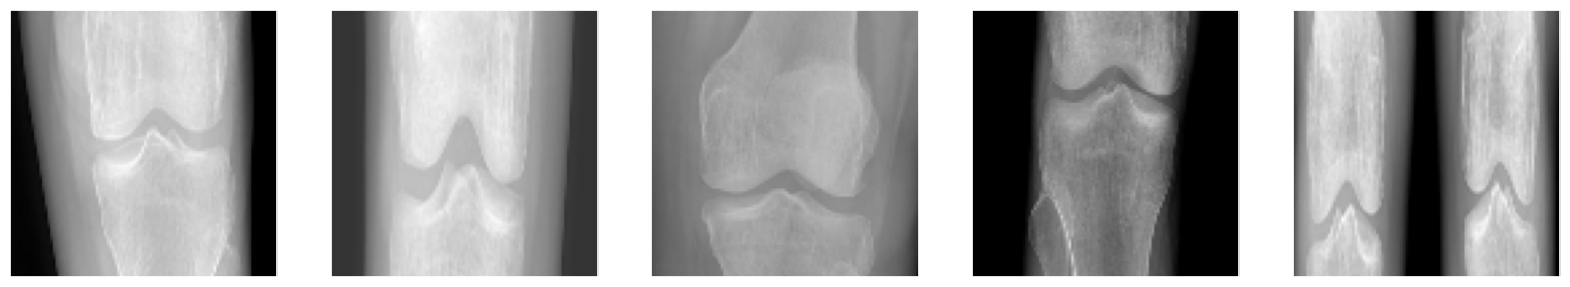

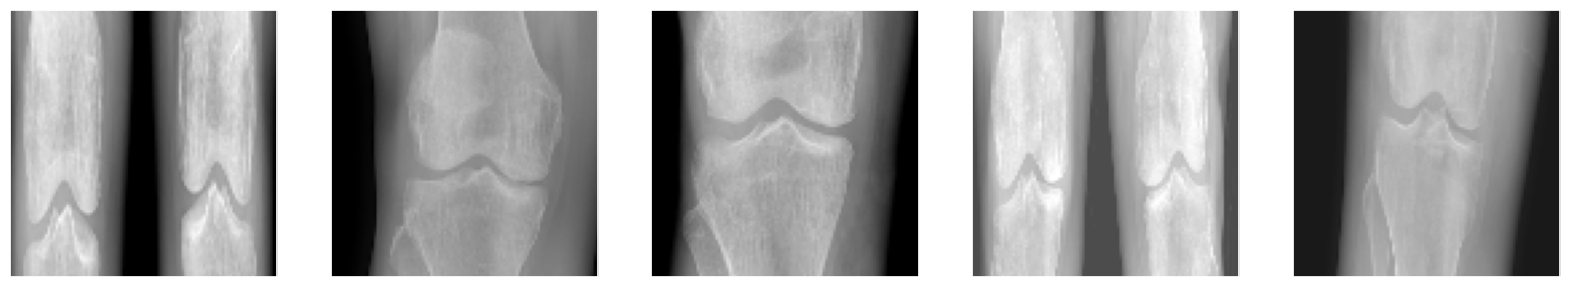

In [ ]:
#@title **10 imagenes normales**

plt.figure(figsize=[20,10])
for i in range(5):
  plt.subplot(2,5,i+1)
  plt.imshow(np.squeeze(imagenes_test_normal[i]))
  plt.xticks([]),plt.yticks([])
  plt.grid(False)
plt.show()
plt.figure(figsize=[20,10])
for i in range(5):
  plt.subplot(2,5,i+1)
  plt.imshow(np.squeeze(imagenes_test_normal[i+4]))
  plt.xticks([]),plt.yticks([])
  plt.grid(False)
plt.show()



<Figure size 800x800 with 0 Axes>

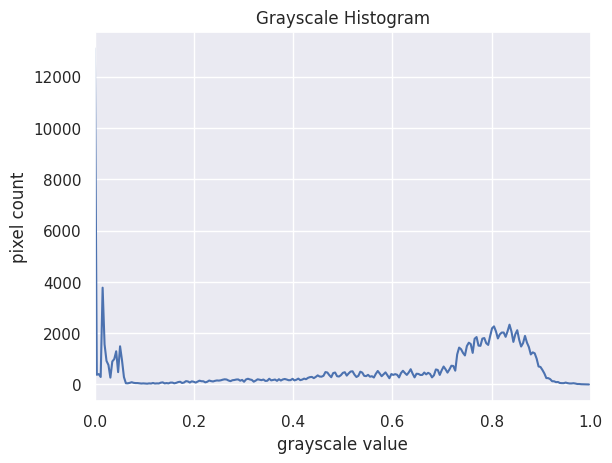

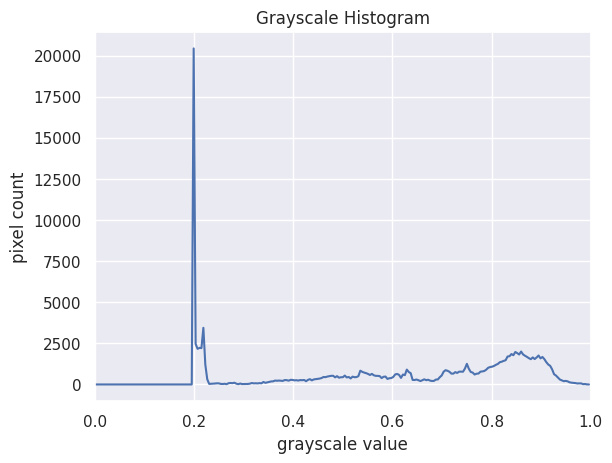

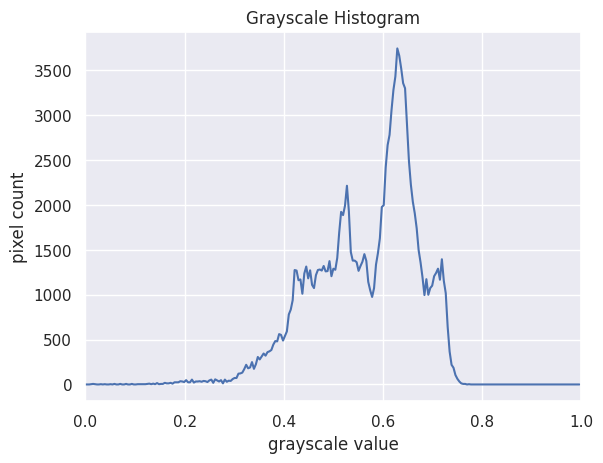

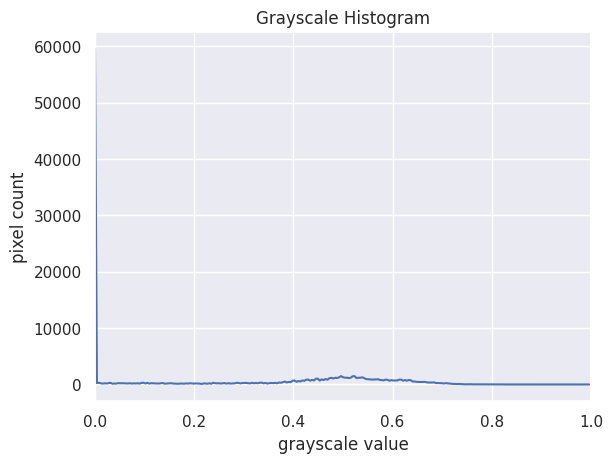

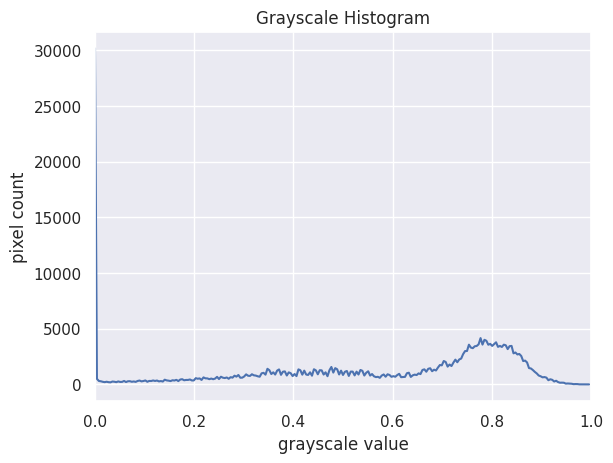

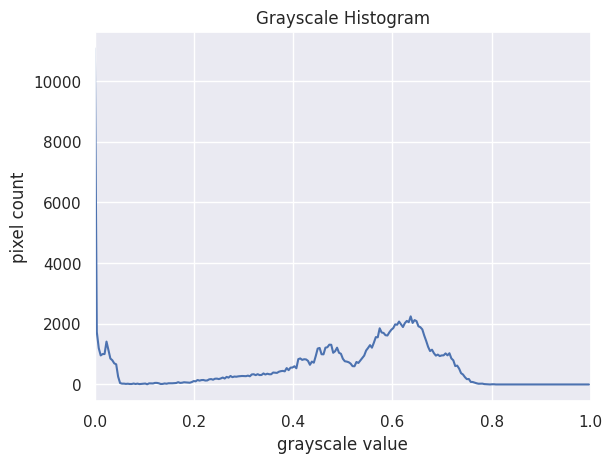

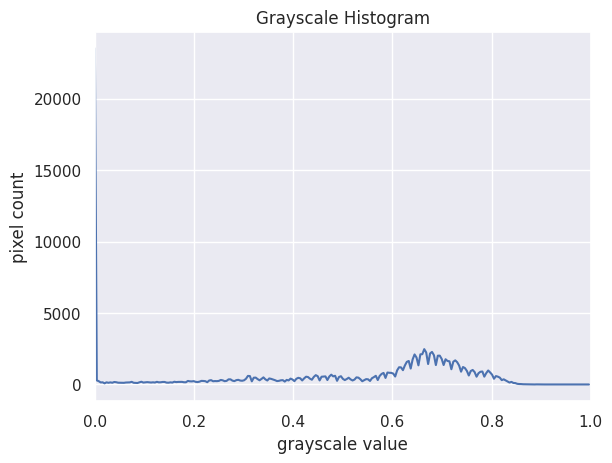

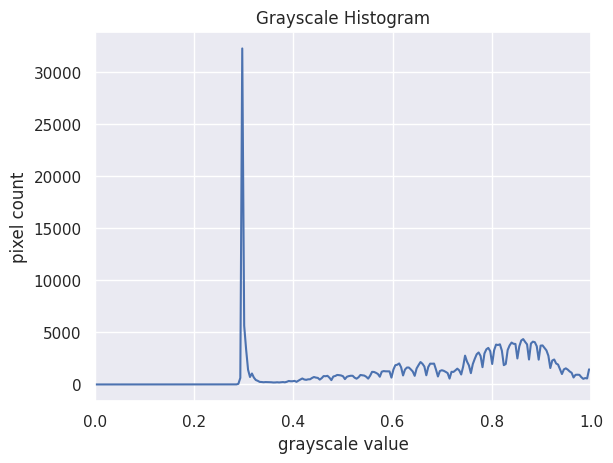

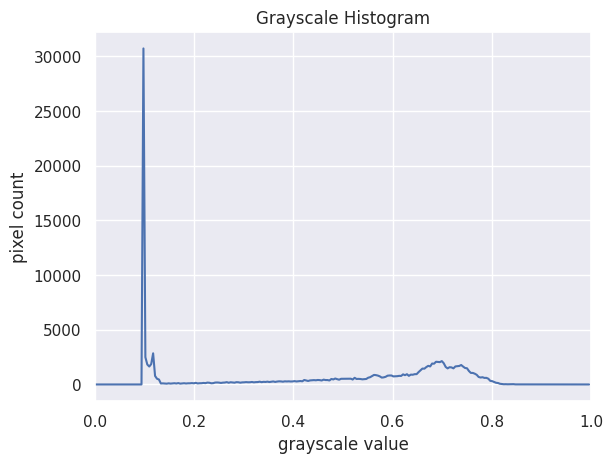

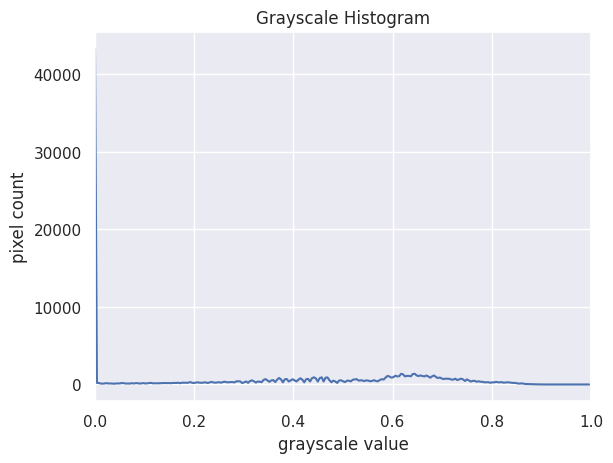

In [ ]:
#@title **10 histogramas**
ruta_test= ruta_test_normal
ruta_test2= "/content/drive/MyDrive/Inteligencia_Artificial_1/test/test/Normal"
mi_ruta= ruta_test2 + "/" + os.listdir(ruta_test)[0]
plt.figure(figsize=[8,8])
for i in range(10):
  #print(os.listdir(ruta_test)[i])
  mi_ruta= ruta_test2 + "/" + os.listdir(ruta_test)[i]
  imagen = iio.imread(mi_ruta)
  # convert the image to float dtype with a value range from 0 to 1
  imagen = ski.util.img_as_float(imagen)
  histogram, bin_edges = np.histogram(imagen, bins=256, range=(0, 1))

  # configure and draw the histogram figure
  fig, ax = plt.subplots()
  ax.set_title("Grayscale Histogram")
  ax.set_xlabel("grayscale value")
  ax.set_ylabel("pixel count")
  ax.set_xlim([0.0, 1.0])  # <- named arguments do not work here

  ax.plot(bin_edges[0:-1], histogram)  # <- or here
plt.show()


In [ ]:

#x =np.mean(np.squeeze(np.array(imagenes_test_normal)))
x= np.array(imagenes_test_normal)
x=np.squeeze(x)
print(x)
#plt.imshow(np.squeeze(imagenes_test_normal[i]))
imagen = iio.imread(mi_ruta)
# convert the image to float dtype with a value range from 0 to 1
imagen = ski.util.img_as_float(imagen)
histogram, bin_edges = np.histogram(imagen, bins=256, range=(0, 1))

# configure and draw the histogram figure
fig, ax = plt.subplots()
ax.set_title("Grayscale Histogram")
ax.set_xlabel("grayscale value")
ax.set_ylabel("pixel count")
ax.set_xlim([0.0, 1.0])  # <- named arguments do not work here

ax.plot(bin_edges[0:-1], histogram)  # <- or here
plt.show()

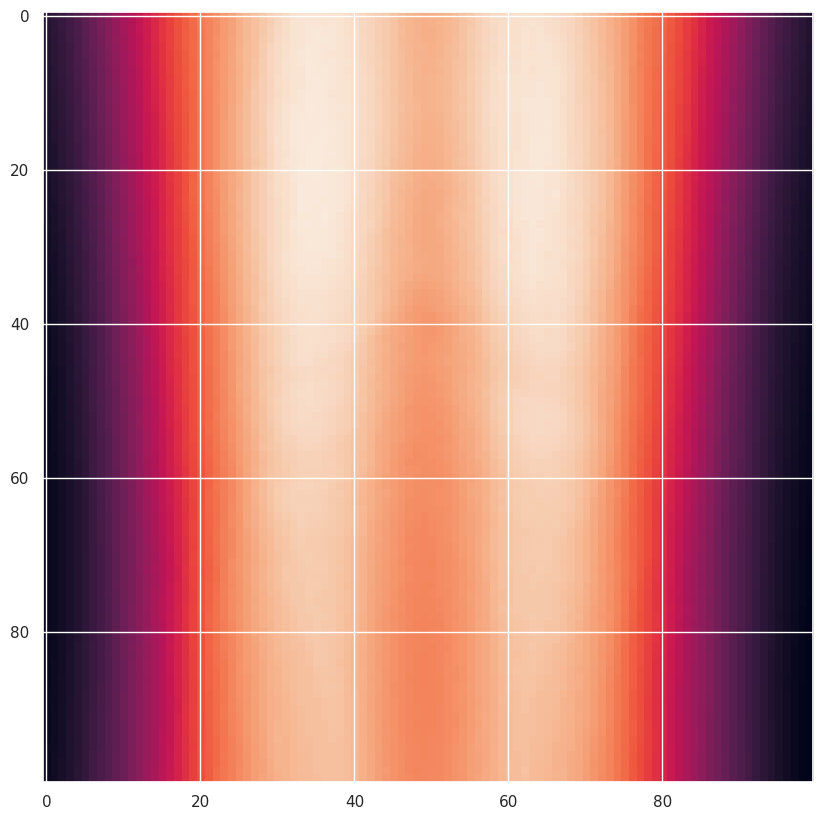

In [ ]:
y= np.array(imagenes_test_normal)
y= np.mean(x,3)
plt.figure(figsize=[20,10])
plt.imshow(np.squeeze(y))
plt.show()

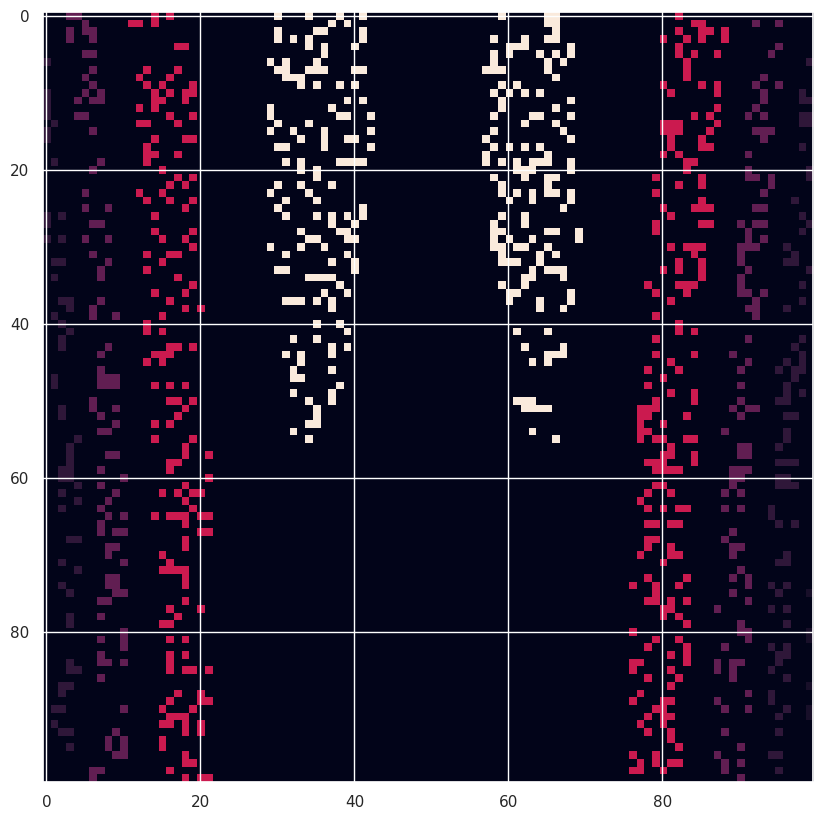

In [ ]:
y= np.array(imagenes_test_normal)
y= np.std(x,3)
plt.figure(figsize=[20,10])
plt.imshow(np.squeeze(y))
plt.show()

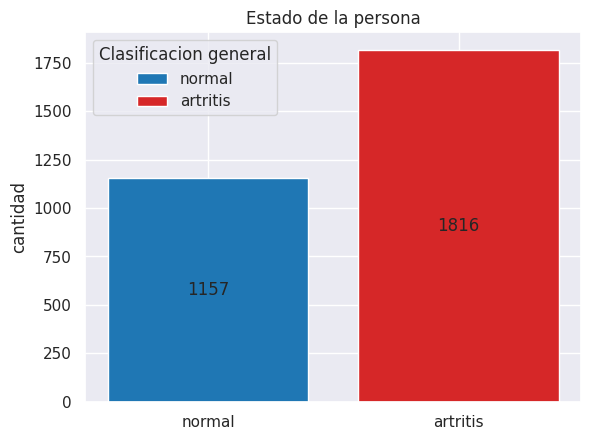

In [ ]:
fig, ax = plt.subplots()

estado = ['normal', 'artritis']
cantidades = [len(imagenes_test_normal)+len(imagenes_entrenamiento_normal), len(imagenes_entrenamiento_artritis)+len(imagenes_test_artritis)]
bar_labels = ['normal', 'artritis']
bar_colors = ['tab:blue', 'tab:red']
bottom= np.zeros(2)

p = ax.bar(estado, cantidades, label=bar_labels, color=bar_colors, bottom=bottom)

ax.bar_label(p, label_type='center')

ax.set_ylabel('cantidad')
ax.set_title('Estado de la persona')
ax.legend(title='Clasificacion general')

plt.show()

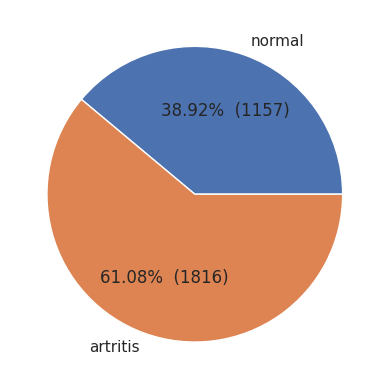

In [47]:
estado = ["normal","artritis"]
cantidades = [len(imagenes_test_normal)+len(imagenes_entrenamiento_normal), len(imagenes_entrenamiento_artritis)+len(imagenes_test_artritis)]

fig, ax = plt.subplots()


def make_autopct(cantidades):
    def my_autopct(pct):
        total = sum(cantidades)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct


ax.pie(cantidades, labels=estado, autopct=make_autopct(cantidades))
plt.show()

In [48]:
#@title **code** USAR LAS IMAGENES DE TEST Y REVOLVERLAS, SIN ARTRITIS (0), CON ARTRITIS(0)
perm = np.random.permutation(range(len(imagenes_test)))
X_test = np.r_[imagenes_test]
y_test=np.r_[y_test]
X_test=  X_test[perm]
X_test= np.squeeze(X_test)
y_test=y_test[perm]
print(X_test.shape)

(623, 100, 100, 3)


In [49]:
#@title **code** USAR LAS IMAGENES DE ENTRENAMIENTO
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

perm = np.random.permutation(range(len(imagenes_entrenamiento)))
X_train = np.r_[imagenes_entrenamiento]
y_train=np.r_[y_train]
X_train=  X_train[perm]
X_train= np.squeeze(X_train)
y_train=y_train[perm]
print(X_train.shape)




(2350, 100, 100, 3)


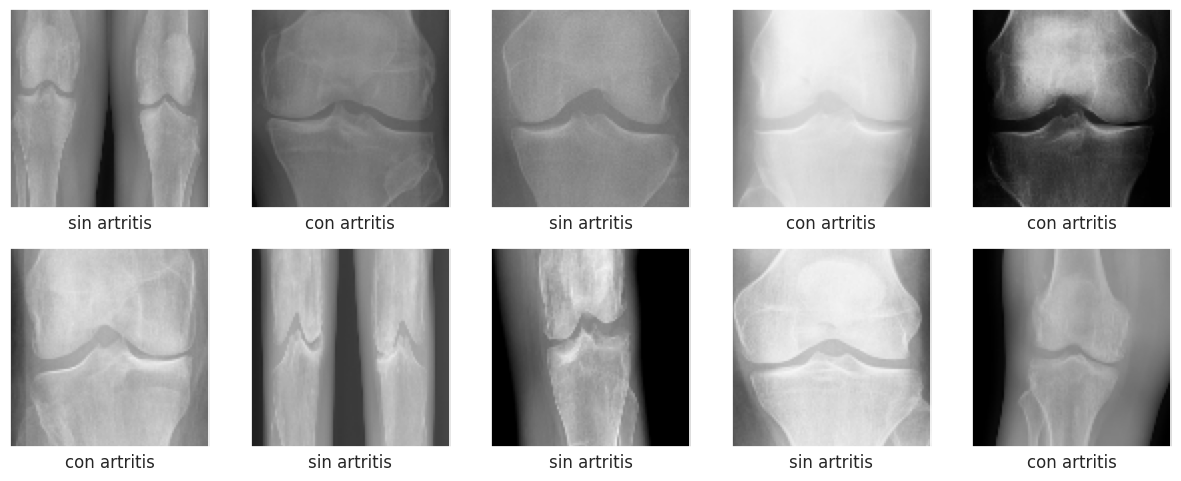

In [ ]:
#@title VISUALIZANDO LAS IMAGENES DE ENTRENAMIENTO
archivo = ['sin artritis','con artritis']
plt.figure(figsize=(15,15))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.Greys_r)
    plt.xlabel(archivo[y_train[i]])

In [50]:
print("cantidad de imágenes para entrenamiento: ",X_train.shape[0])
print("cantidad de imágenes para testeo: ",len(y_test))
print("Cantidad total de imágenes:",X_train.shape[0]+len(y_test))
print("Porcentaje para entrenamiento: ",X_train.shape[0]/(X_train.shape[0]+y_test.shape[0]))
print("dimensiones de las imágenes: ",X_train[0].shape)

cantidad de imágenes para entrenamiento:  2350
cantidad de imágenes para testeo:  623
Cantidad total de imágenes: 2973
Porcentaje para entrenamiento:  0.7904473595694584
dimensiones de las imágenes:  (100, 100, 3)


In [51]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.
X_test = X_test / 255.

print("cantidad de imágenes para entrenamiento: ",X_train.shape[0])
print("cantidad de imágenes para testeo: ",len(y_test))

cantidad de imágenes para entrenamiento:  2350
cantidad de imágenes para testeo:  623


In [60]:
#@title **code** NORMALIZACION
X_train_n=[]
X_test_n=[]
#n=int(len(X_s)*0.70) #cantidad de datos para train 70%
for i in range(X_train.shape[0]):
  X_train_n.append(X_train[i].flatten())
for i in range(X_test.shape[0]):
  X_test_n.append(X_train[i].flatten())


In [13]:
#@title **code** Estimador decision tree con parametros por defectos


estimador_decision_tree_defecto= DecisionTreeClassifier()
estimador_decision_tree_defecto.fit(X_train_n,y_train)
y_pred= estimador_decision_tree_defecto.predict(X_test_n)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.56      0.33      0.42       347
           1       0.44      0.67      0.53       276

    accuracy                           0.48       623
   macro avg       0.50      0.50      0.47       623
weighted avg       0.51      0.48      0.47       623



In [ ]:
#@title **code** Accuraccy score de decision tree con parametros por defectos
print(accuracy_score(estimador_decision_tree_defecto.predict(X_test_n), y_test))

0.492776886035313


In [ ]:
#@title **code** decision tree con tunning de parametros
estimador_decision_tree_tunning= DecisionTreeClassifier(max_depth=15,criterion='log_loss')
estimador_decision_tree_tunning.fit(X_train_n,y_train)
y_pred= estimador_decision_tree_tunning.predict(X_test_n)

# a partir de una profundidad de 15 en adelante se produce el mismo acuraccy score
# con menos de 14 tambien se reduce el acuraccy score
# con la profundidad de 15 usando gini como entropy se obtiene el mismo valor de acuraccy que cuando se usan parametros por defecto del DT
# con max_depth=15 en log_loss muestra mejoria del acuraccy score (0.4943820224719101)
# incluso probando variando la profundidad en log_loss el mejor resultado se consiguio con profundidad de 15

In [ ]:
#@title accuraccy score con tunning de parametros
print(accuracy_score(estimador_decision_tree_tunning.predict(X_test_n), y_test))

0.4943820224719101


In [ ]:
#@title **code:** usando Random forest classifier con parametros por defecto
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import *
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

estimador_random_forest_defecto = RandomForestClassifier()

estimador_random_forest_defecto.fit(X_train_n, y_train)


RandomForestClassifier()

In [ ]:
#@title **code:** acuraccy score de Random forest classifier con parametros por defecto

print(accuracy_score(estimador_random_forest_defecto.predict(X_test_n), y_test))

# con random forest con parametros por defecto su valor de acuraccy score es menor al valor que obtenemos de DT con tunning

0.492776886035313


In [ ]:
#@title **code:** usando Random forest classifier con parametros con tunning
estimador_random_forest_tunning = RandomForestClassifier(n_estimators=30,criterion='log_loss',max_depth=15)

estimador_random_forest_tunning.fit(X_train_n, y_train)

# los n_estimators superiores a 100 no pareces afectar el acuraccy score
# reducir a 30 los n_estimators elevo el acuraccy_score, con ese valor supero el mejor valor de decision tree (0.4959871589085072)
# reducirlo a 25 solo resulto en un menor porcentaje de accuracy score
# con 28 y 29 dio lo mismo que 25 (no tan bueno)
# en 40 sigue repitiendo los mismos acuraccy score (0.492776886035313)
# incluso con 32 y 31 provoca el mismo resultado
# por si acaso tambien revise con los criterios de gini y entropy pero al parecer el mejor acuraccy se da con log_loss y 30 n_estimators
# incluso usando 30 n_estimator la aparicion del acuraccy_score superior al del del decision tree es bastanto fuera de lo comun(incluso alcanso a bajar un 0.01 de mas)

RandomForestClassifier(criterion='log_loss', max_depth=15, n_estimators=30)

In [ ]:
#@title **code:** acuraccy score de Random forest classifier con parametros con tunning

print(accuracy_score(estimador_random_forest_tunning.predict(X_test_n), y_test))

0.492776886035313


In [ ]:
#@title **code:** usando Support Vector Machine con parametros por defecto
from sklearn.svm import SVC

estimador_vectorial_defecto = SVC()
estimador_vectorial_defecto.fit(X_train_n,y_train)

#con parametros por defecto incluso supero los otros dos estimadores hasta por 0.02 (0.49919743178170145)

SVC()

In [ ]:
#@title **code:** Accuracy Score usando Support Vector Machine con parametros por defecto

print(accuracy_score(estimador_vectorial_defecto.predict(X_test_n), y_test))



0.49919743178170145


In [ ]:
#@title **code:** usando Support Vector Machine con parametros de tunning
from sklearn.svm import SVC

estimador_vectorial_tunning = SVC(kernel='linear')
estimador_vectorial_tunning.fit(X_train_n,y_train)

#con poly obtiene e mismo valor que con parametro por defecto (0.49919743178170145)
# #con sigmoide obtuve el peor valor de todos los acuraccy (0.463884430176565)
# con kernel precomputed simplemente no sirvio, lanza un error de algo de una matriz
# con linear da un resultado similar a los demas intentos de los demas estimadores (0.492776886035313)

SVC(kernel='linear')

In [ ]:
#@title **code:** Accuracy Score usando Support Vector Machine de tunning

print(accuracy_score(estimador_vectorial_tunning.predict(X_test_n), y_test))

0.492776886035313


In [52]:
#@title **code** To normalize and prepare data

print('x_train shape:', X_train.shape)
print('Number of images in x_train', X_train.shape[0])
print('Number of images in x_test', X_test.shape[0])

x_train shape: (2350, 100, 100, 3)
Number of images in x_train 2350
Number of images in x_test 623


In [64]:
#@title **code:** red neuronal artificial simple (capa entrada, capa oculta, capa salida)
import tensorflow as tf
from tensorflow import keras


model1 = tf.keras.Sequential([
    tf.keras.layers.Flatten( input_shape=[100, 100, 3]),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(2, activation=tf.nn.softmax)
])

model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 30000)             0         
                                                                 
 dense_8 (Dense)             (None, 128)               3840128   
                                                                 
 dense_9 (Dense)             (None, 2)                 258       
                                                                 
Total params: 3840386 (14.65 MB)
Trainable params: 3840386 (14.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#@title **code** entrenamiento neurona
model1.compile(optimizer=tf.keras.optimizers.SGD(),  #AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])




In [72]:
#@title **code**probando con  10 epoch
model1.fit(X_train, y_train, epochs=10)

test_loss,test_acc = model1.evaluate(X_test, y_test,verbose=1)
print('Test accuracy:', test_acc)

Epoch 1/10
74/74 [==============================] - 1s 14ms/step - loss: 0.6269 - accuracy: 0.6591
Epoch 2/10
74/74 [==============================] - 1s 15ms/step - loss: 0.6294 - accuracy: 0.6540
Epoch 3/10
74/74 [==============================] - 1s 15ms/step - loss: 0.6289 - accuracy: 0.6536
Epoch 4/10
74/74 [==============================] - 1s 14ms/step - loss: 0.6283 - accuracy: 0.6570
Epoch 5/10
74/74 [==============================] - 1s 15ms/step - loss: 0.6315 - accuracy: 0.6553
Epoch 6/10
74/74 [==============================] - 1s 15ms/step - loss: 0.6278 - accuracy: 0.6583
Epoch 7/10
74/74 [==============================] - 1s 14ms/step - loss: 0.6268 - accuracy: 0.6579
Epoch 8/10
74/74 [==============================] - 1s 15ms/step - loss: 0.6274 - accuracy: 0.6587
Epoch 9/10
74/74 [==============================] - 1s 16ms/step - loss: 0.6256 - accuracy: 0.6591
Epoch 10/10
20/20 [==============================] - 0s 12ms/step - loss: 0.9539 - accuracy: 0.4398
Test accu

In [71]:
#@title **code**probando con  20 epoch
model1.fit(X_train, y_train, epochs=20)

test_loss,test_acc = model1.evaluate(X_test, y_test,verbose=1)
print('Test accuracy:', test_acc)

Epoch 1/20
74/74 [==============================] - 1s 15ms/step - loss: 0.6313 - accuracy: 0.6557
Epoch 2/20
74/74 [==============================] - 1s 15ms/step - loss: 0.6336 - accuracy: 0.6562
Epoch 3/20
74/74 [==============================] - 1s 15ms/step - loss: 0.6331 - accuracy: 0.6545
Epoch 4/20
74/74 [==============================] - 1s 19ms/step - loss: 0.6318 - accuracy: 0.6562
Epoch 5/20
74/74 [==============================] - 2s 20ms/step - loss: 0.6294 - accuracy: 0.6583
Epoch 6/20
74/74 [==============================] - 1s 15ms/step - loss: 0.6326 - accuracy: 0.6549
Epoch 7/20
74/74 [==============================] - 1s 14ms/step - loss: 0.6320 - accuracy: 0.6557
Epoch 8/20
74/74 [==============================] - 1s 15ms/step - loss: 0.6302 - accuracy: 0.6570
Epoch 9/20
74/74 [==============================] - 1s 14ms/step - loss: 0.6299 - accuracy: 0.6536
Epoch 10/20
74/74 [==============================] - 1s 15ms/step - loss: 0.6303 - accuracy: 0.6566
Epoch 11/

In [70]:
#@title **code**probando con  30 epoch
model1.fit(X_train, y_train, epochs=30)
test_loss,test_acc = model1.evaluate(X_test, y_test,verbose=1)
print('Test accuracy:', test_acc)

Epoch 1/30
74/74 [==============================] - 1s 15ms/step - loss: 0.6353 - accuracy: 0.6557
Epoch 2/30
74/74 [==============================] - 1s 14ms/step - loss: 0.6369 - accuracy: 0.6553
Epoch 3/30
74/74 [==============================] - 1s 14ms/step - loss: 0.6363 - accuracy: 0.6553
Epoch 4/30
74/74 [==============================] - 1s 14ms/step - loss: 0.6380 - accuracy: 0.6553
Epoch 5/30
74/74 [==============================] - 1s 15ms/step - loss: 0.6352 - accuracy: 0.6553
Epoch 6/30
74/74 [==============================] - 1s 15ms/step - loss: 0.6365 - accuracy: 0.6557
Epoch 7/30
74/74 [==============================] - 1s 19ms/step - loss: 0.6378 - accuracy: 0.6557
Epoch 8/30
74/74 [==============================] - 2s 21ms/step - loss: 0.6358 - accuracy: 0.6549
Epoch 9/30
74/74 [==============================] - 1s 18ms/step - loss: 0.6358 - accuracy: 0.6532
Epoch 10/30
74/74 [==============================] - 1s 15ms/step - loss: 0.6363 - accuracy: 0.6549
Epoch 11/

In [73]:
#@title **code:** red neuronal artificial simple (capa entrada, (3)capa oculta, capa salida)
import tensorflow as tf
from tensorflow import keras

model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten( input_shape=[100, 100, 3]),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(32, activation=tf.nn.relu),
    tf.keras.layers.Dense(2, activation=tf.nn.softmax)
])

model2.summary()

model2.compile(optimizer=tf.keras.optimizers.SGD(),  #AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 30000)             0         
                                                                 
 dense_10 (Dense)            (None, 128)               3840128   
                                                                 
 dense_11 (Dense)            (None, 64)                8256      
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 2)                 66        
                                                                 
Total params: 3850530 (14.69 MB)
Trainable params: 3850530 (14.69 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [75]:
#@title **code** probando con 10 epoch
model2.fit(X_train, y_train, epochs=10)

test_loss,test_acc = model2.evaluate(X_test, y_test,verbose=1)
print('Test accuracy:', test_acc)

Epoch 1/10
74/74 [==============================] - 2s 18ms/step - loss: 0.6870 - accuracy: 0.6349
Epoch 2/10
74/74 [==============================] - 1s 14ms/step - loss: 0.6537 - accuracy: 0.6549
Epoch 3/10
74/74 [==============================] - 1s 15ms/step - loss: 0.6515 - accuracy: 0.6553
Epoch 4/10
74/74 [==============================] - 1s 15ms/step - loss: 0.6489 - accuracy: 0.6553
Epoch 5/10
74/74 [==============================] - 1s 15ms/step - loss: 0.6470 - accuracy: 0.6553
Epoch 6/10
74/74 [==============================] - 1s 15ms/step - loss: 0.6551 - accuracy: 0.6511
Epoch 7/10
74/74 [==============================] - 1s 16ms/step - loss: 0.6505 - accuracy: 0.6553
Epoch 8/10
74/74 [==============================] - 2s 21ms/step - loss: 0.6466 - accuracy: 0.6553
Epoch 9/10
74/74 [==============================] - 1s 19ms/step - loss: 0.6486 - accuracy: 0.6549
Epoch 10/10
20/20 [==============================] - 0s 8ms/step - loss: 0.8044 - accuracy: 0.4430
Test accur

In [76]:
#@title **code**probando con  20 epoch
model2.fit(X_train, y_train, epochs=20)

test_loss,test_acc = model2.evaluate(X_test, y_test,verbose=1)
print('Test accuracy:', test_acc)

Epoch 1/20
74/74 [==============================] - 1s 18ms/step - loss: 0.6473 - accuracy: 0.6553
Epoch 2/20
74/74 [==============================] - 1s 17ms/step - loss: 0.6443 - accuracy: 0.6553
Epoch 3/20
74/74 [==============================] - 1s 19ms/step - loss: 0.6459 - accuracy: 0.6553
Epoch 4/20
74/74 [==============================] - 1s 19ms/step - loss: 0.6453 - accuracy: 0.6553
Epoch 5/20
74/74 [==============================] - 1s 19ms/step - loss: 0.6459 - accuracy: 0.6485
Epoch 6/20
74/74 [==============================] - 1s 18ms/step - loss: 0.6446 - accuracy: 0.6553
Epoch 7/20
74/74 [==============================] - 1s 19ms/step - loss: 0.6462 - accuracy: 0.6553
Epoch 8/20
74/74 [==============================] - 1s 19ms/step - loss: 0.6446 - accuracy: 0.6553
Epoch 9/20
74/74 [==============================] - 2s 25ms/step - loss: 0.6441 - accuracy: 0.6553
Epoch 10/20
74/74 [==============================] - 2s 26ms/step - loss: 0.6431 - accuracy: 0.6553
Epoch 11/

In [77]:
#@title **code**probando con  30 epoch
model2.fit(X_train, y_train, epochs=30)
test_loss,test_acc = model2.evaluate(X_test, y_test,verbose=1)
print('Test accuracy:', test_acc)

Epoch 1/30
74/74 [==============================] - 2s 22ms/step - loss: 0.6426 - accuracy: 0.6553
Epoch 2/30
74/74 [==============================] - 1s 19ms/step - loss: 0.6436 - accuracy: 0.6553
Epoch 3/30
74/74 [==============================] - 1s 16ms/step - loss: 0.6448 - accuracy: 0.6553
Epoch 4/30
74/74 [==============================] - 1s 13ms/step - loss: 0.6430 - accuracy: 0.6553
Epoch 5/30
74/74 [==============================] - 1s 13ms/step - loss: 0.6421 - accuracy: 0.6553
Epoch 6/30
74/74 [==============================] - 1s 14ms/step - loss: 0.6429 - accuracy: 0.6553
Epoch 7/30
74/74 [==============================] - 1s 13ms/step - loss: 0.6411 - accuracy: 0.6553
Epoch 8/30
74/74 [==============================] - 1s 13ms/step - loss: 0.6423 - accuracy: 0.6553
Epoch 9/30
74/74 [==============================] - 1s 13ms/step - loss: 0.6422 - accuracy: 0.6553
Epoch 10/30
74/74 [==============================] - 1s 13ms/step - loss: 0.6418 - accuracy: 0.6553
Epoch 11/

In [78]:
#@title **code:** red neuronal artificial simple (capa entrada, (6)capa oculta, capa salida)
import tensorflow as tf
from tensorflow import keras

model3 = tf.keras.Sequential([
    tf.keras.layers.Flatten( input_shape=[100, 100, 3]),
    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(32, activation=tf.nn.relu),
    tf.keras.layers.Dense(2, activation=tf.nn.softmax)
])

model3.summary()

model3.compile(optimizer=tf.keras.optimizers.SGD(),  #AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 30000)             0         
                                                                 
 dense_14 (Dense)            (None, 1024)              30721024  
                                                                 
 dense_15 (Dense)            (None, 512)               524800    
                                                                 
 dense_16 (Dense)            (None, 256)               131328    
                                                                 
 dense_17 (Dense)            (None, 128)               32896     
                                                                 
 dense_18 (Dense)            (None, 64)                8256      
                                                                 
 dense_19 (Dense)            (None, 32)               

In [79]:
#@title **code** probando con 10 epoch
model3.fit(X_train, y_train, epochs=10)

test_loss,test_acc = model3.evaluate(X_test, y_test,verbose=1)
print('Test accuracy:', test_acc)

Epoch 1/10
74/74 [==============================] - 10s 128ms/step - loss: 0.6526 - accuracy: 0.6532
Epoch 2/10
74/74 [==============================] - 9s 116ms/step - loss: 0.6478 - accuracy: 0.6553
Epoch 3/10
74/74 [==============================] - 10s 132ms/step - loss: 0.6491 - accuracy: 0.6553
Epoch 4/10
74/74 [==============================] - 10s 133ms/step - loss: 0.6468 - accuracy: 0.6553
Epoch 5/10
74/74 [==============================] - 13s 179ms/step - loss: 0.6488 - accuracy: 0.6553
Epoch 6/10
74/74 [==============================] - 10s 131ms/step - loss: 0.6463 - accuracy: 0.6553
Epoch 7/10
74/74 [==============================] - 10s 131ms/step - loss: 0.6460 - accuracy: 0.6553
Epoch 8/10
74/74 [==============================] - 10s 134ms/step - loss: 0.6450 - accuracy: 0.6553
Epoch 9/10
74/74 [==============================] - 10s 142ms/step - loss: 0.6449 - accuracy: 0.6553
Epoch 10/10
20/20 [==============================] - 1s 36ms/step - loss: 0.8345 - accuracy:

In [80]:
#@title **code**probando con  20 epoch
model3.fit(X_train, y_train, epochs=20)

test_loss,test_acc = model3.evaluate(X_test, y_test,verbose=1)
print('Test accuracy:', test_acc)

Epoch 1/20
74/74 [==============================] - 10s 133ms/step - loss: 0.6439 - accuracy: 0.6553
Epoch 2/20
74/74 [==============================] - 9s 122ms/step - loss: 0.6441 - accuracy: 0.6553
Epoch 3/20
74/74 [==============================] - 10s 136ms/step - loss: 0.6443 - accuracy: 0.6549
Epoch 4/20
74/74 [==============================] - 10s 136ms/step - loss: 0.6435 - accuracy: 0.6553
Epoch 5/20
74/74 [==============================] - 10s 134ms/step - loss: 0.6433 - accuracy: 0.6553
Epoch 6/20
74/74 [==============================] - 9s 123ms/step - loss: 0.6433 - accuracy: 0.6553
Epoch 7/20
74/74 [==============================] - 10s 137ms/step - loss: 0.6425 - accuracy: 0.6553
Epoch 8/20
74/74 [==============================] - 10s 134ms/step - loss: 0.6423 - accuracy: 0.6553
Epoch 9/20
74/74 [==============================] - 10s 134ms/step - loss: 0.6435 - accuracy: 0.6553
Epoch 10/20
74/74 [==============================] - 9s 121ms/step - loss: 0.6425 - accuracy:

In [81]:
#@title **code**probando con  30 epoch
model3.fit(X_train, y_train, epochs=30)
test_loss,test_acc = model3.evaluate(X_test, y_test,verbose=1)
print('Test accuracy:', test_acc)

Epoch 1/30
74/74 [==============================] - 10s 131ms/step - loss: 0.6402 - accuracy: 0.6553
Epoch 2/30
74/74 [==============================] - 10s 135ms/step - loss: 0.6422 - accuracy: 0.6553
Epoch 3/30
74/74 [==============================] - 10s 135ms/step - loss: 0.6414 - accuracy: 0.6553
Epoch 4/30
74/74 [==============================] - 9s 121ms/step - loss: 0.6409 - accuracy: 0.6553
Epoch 5/30
74/74 [==============================] - 10s 137ms/step - loss: 0.6407 - accuracy: 0.6553
Epoch 6/30
74/74 [==============================] - 10s 136ms/step - loss: 0.6411 - accuracy: 0.6553
Epoch 7/30
74/74 [==============================] - 10s 134ms/step - loss: 0.6408 - accuracy: 0.6553
Epoch 8/30
74/74 [==============================] - 9s 124ms/step - loss: 0.6409 - accuracy: 0.6553
Epoch 9/30
74/74 [==============================] - 10s 128ms/step - loss: 0.6406 - accuracy: 0.6553
Epoch 10/30
74/74 [==============================] - 10s 133ms/step - loss: 0.6395 - accuracy